# Implicit Radiation Transport Tests
#### ([Jiang 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract), § 4)
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/28/2023          |
| Updated |  09/13/2023          |

## [Units](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $L_0 / v_0$
- Ideal Gas
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
  - Constant mean molecular weight $\mu$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{p})$
  - Velocity $v_0 = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{p})}$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} \equiv \mathcal{C} \equiv c/v_0$
  - $\mathbb{P} \equiv \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$


## 4.1. Thermal Equilibrium in a Uniform Medium

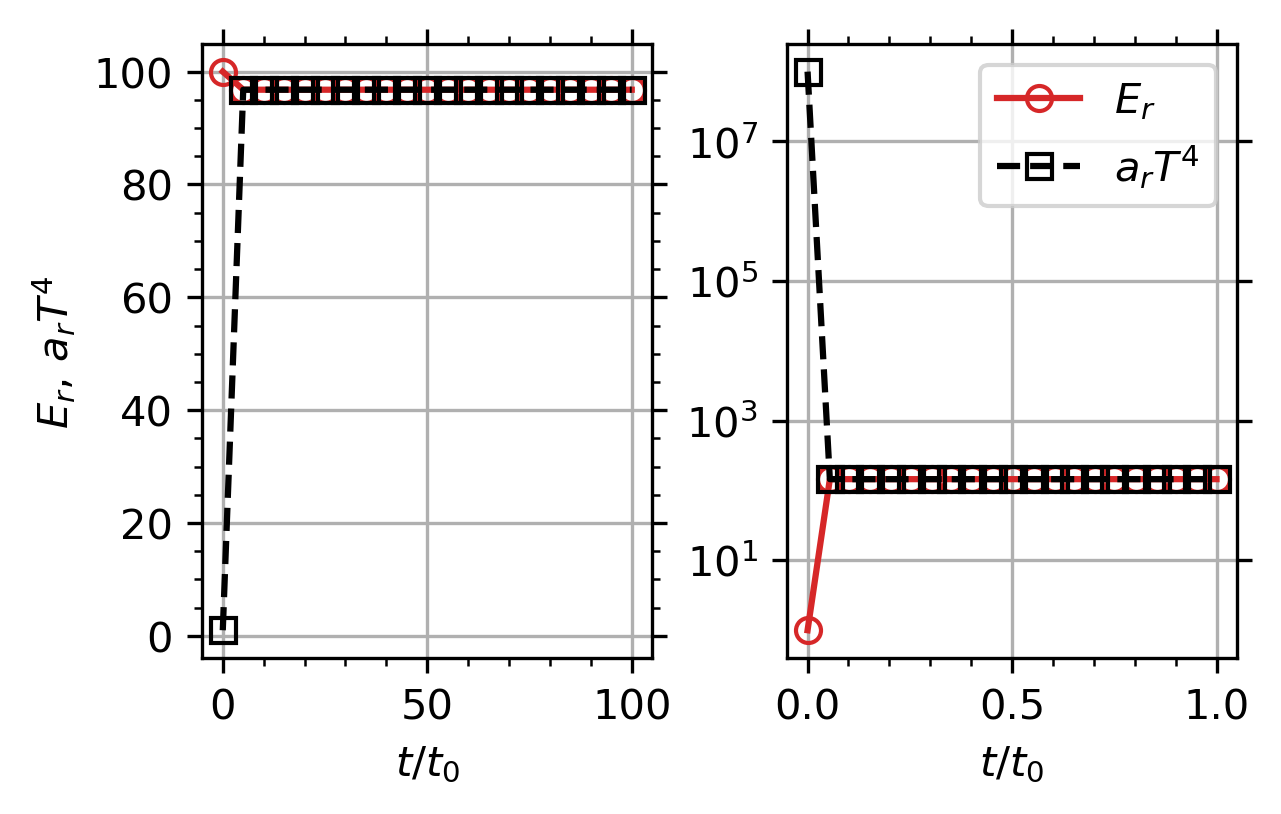

In [3]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(4.45, 2.66), dpi=300)

# Test 1
athinput = athena_read.athinput(f'athinput.thermal_relaxation')
gamma = athinput['hydro']['gamma']   # C_p/C_v = 1 + 2/DoF
prat = athinput['radiation']['prat'] # dimensionless P = a_rT_0^4/P_0
hst = athena_read.hst('output/thermal.hst')
T = (hst['tot-E']*(gamma - 1))      # thermal_relaxation.cpp, line 63
axs[0].plot(hst['time'], hst['Er'], color='tab:red', marker='o',
            fillstyle='none')
axs[0].plot(hst['time'], T**4, color='k', marker='s', ls='--',
            fillstyle='none')
axs[0].set(ylabel='$E_r,\,a_rT^4$')

# Test 2
athinput = athena_read.athinput(f'athinput.thermal_relaxation2')
prat = athinput['radiation']['prat'] # dimensionless P = a_rT_0^4/P_0
hst = athena_read.hst('output/thermal2.hst')
T = (hst['tot-E']*(gamma - 1))
axs[1].semilogy(hst['time'], hst['Er'], color='tab:red', marker='o',
                fillstyle='none',              label='$E_r$')
axs[1].semilogy(hst['time'], T**4, color='k', marker='s', ls='--',
                fillstyle='none', label='$a_rT^4$')
axs[1].legend()

for ax in axs:
    ax.grid()
    ax.minorticks_on()
    ax.set(xlabel='$t/t_0$')
    ax.tick_params(which='both', top=True, right=True)

plt.subplots_adjust(hspace=0, wspace=0.3)
# plt.savefig('figs/NAME.pdf', bbox_inches='tight', pad_inches=0.01)

Cf. Figure 1 ([Jiang 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract))

**NOTE**: $T \propto P = \rho(\gamma - 1)u$, where $u$ is the specific internal energy of the gas [(Classical ideal gas law)](https://en.wikipedia.org/wiki/Equation_of_state#Classical_ideal_gas_law).

## Crossing Beams

In [ ]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(4.45, 2.66), dpi=300)

# Test 1
athinput = athena_read.athinput(f'athinput.thermal_relaxation')
gamma = athinput['hydro']['gamma']   # C_p/C_v = 1 + 2/DoF
prat = athinput['radiation']['prat'] # dimensionless P = a_rT_0^4/P_0
hst = athena_read.hst('output/thermal.hst')
Eg = (hst['tot-E']*(gamma - 1))**4   # thermal_relaxation.cpp, line 63
axs[0].plot(hst['time'], hst['Er'], color='tab:red', marker='o',
            fillstyle='none')
axs[0].plot(hst['time'], Eg, color='k', marker='s', ls='--',
            fillstyle='none')
axs[0].set(ylabel='$E_r,\,a_rT^4$')

# Test 2
athinput = athena_read.athinput(f'athinput.thermal_relaxation2')
prat = athinput['radiation']['prat'] # dimensionless P = a_rT_0^4/P_0
hst = athena_read.hst('output/thermal2.hst')
Eg = (hst['tot-E']*(gamma - 1))**4
axs[1].semilogy(hst['time'], hst['Er'], color='tab:red', marker='o',
                fillstyle='none',              label='$E_r$')
axs[1].semilogy(hst['time'], Eg, color='k', marker='s', ls='--',
                fillstyle='none', label='$a_rT^4$')
axs[1].legend()

for ax in axs:
    ax.grid()
    ax.minorticks_on()
    ax.set(xlabel='$t/t_0$')
    ax.tick_params(which='both', top=True, right=True)

plt.subplots_adjust(hspace=0, wspace=0.3)
# plt.savefig('figs/NAME.pdf', bbox_inches='tight', pad_inches=0.01)

Cf. Figure 3 ([Jiang 2021](https://ui.adsabs.harvard.edu/abs/2021ApJS..253...49J/abstract))